[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128.]


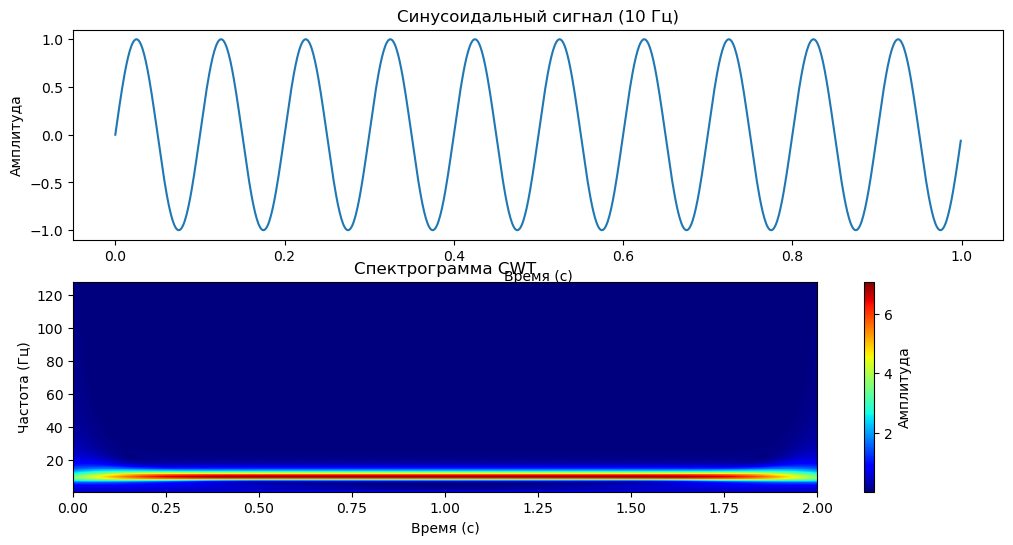

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import pywt

def cwt_spectrogram(x, fs, nNotes=12, detrend=True, normalize=True):
    if detrend:
        x = scipy.signal.detrend(x)
    if normalize:
        x = (x - np.mean(x)) / np.std(x)

    scales = pywt.scale2frequency('cmor1.5-1.0', np.arange(1, 128+ 1)) / (1/fs)
    cwtmatr, freqs = pywt.cwt(x, scales, 'cmor1.5-1.0')
    
    return cwtmatr, freqs

# Создание синусоидального сигнала с частотой 10 Гц
fs = 1000  # Частота дискретизации
t = np.arange(0, 1, 1/fs)
f = 10  # Частота синусоиды
sig = np.sin(2 * np.pi * f * t)
# Вычисление спектрограммы с помощью CWT
cwtmatr, freqs = cwt_spectrogram(sig, fs)
cwtmatr = cwtmatr[::-1, :]
freqs = freqs*1000
print(freqs)
# Отображение сигнала и спектрограммы
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, sig)
plt.title('Синусоидальный сигнал (10 Гц)')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')

plt.subplot(2, 1, 2)
plt.imshow(np.abs(cwtmatr), extent=[0, 2, freqs[0], freqs[-1]], aspect='auto', cmap='jet')
plt.colorbar(label='Амплитуда')
plt.title('Спектрограмма CWT')
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

In [3]:
#plt.specgram(np.abs(cwtmatr), NFFT = 128, Fs=1/fs, noverlap=120, cmap = "jet")

In [ ]:
print(cwtmatr)

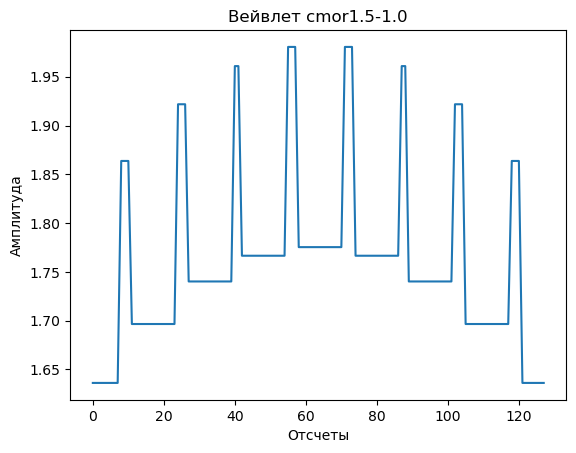

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

n = 128
signal = np.ones(n)
# Создаем вейвлет
scales = pywt.scale2frequency('cmor1.5-1.0', np.arange(1, n+1)) / (1/fs)
wavelet_data, _ = pywt.cwt(signal, scales, 'cmor1.5-1.0')

# Отображаем вейвлет
plt.plot(np.real(wavelet_data[0]))  # Вейвлет представлен в виде действительной части
plt.title('Вейвлет cmor1.5-1.0')
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.show()

108000


<function matplotlib.pyplot.show(close=None, block=None)>

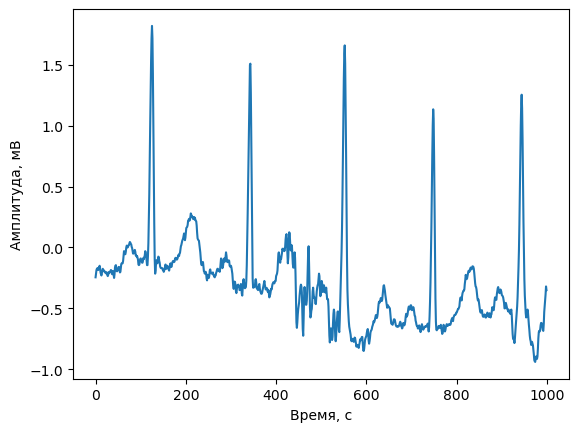

In [8]:
# Здесь как сказал семчук 5 периодов
ecg_test = scipy.datasets.electrocardiogram()
print(len(ecg_test))
plt.plot(ecg_test[:1000])
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, мВ')
plt.show

[500.         485.76597058 471.93715634 458.5020216  445.44935907
 432.7682805  420.44820763 408.47886331 396.85026299 385.55270635
 374.57676922 363.91329571 353.55339059 343.48841186 333.70996354
 324.20988866 314.98026247 306.01338583 297.30177875 288.83817422
 280.61551208 272.62693317 264.86577359 257.32555916 250.
 242.88298529 235.96857817 229.2510108  222.72467954 216.38414025
 210.22410381 204.23943166 198.4251315  192.77635318 187.28838461
 181.95664786 176.7766953  171.74420593 166.85498177 162.10494433
 157.49013124 153.00669291 148.65088938 144.41908711 140.30775604
 136.31346658 132.43288679 128.66277958 125.         121.44149264
 117.98428909 114.6255054  111.36233977 108.19207013 105.11205191
 102.11971583  99.21256575  96.38817659  93.6441923   90.97832393
  88.38834765  85.87210297  83.42749089  81.05247217  78.74506562
  76.50334646  74.32544469  72.20954355  70.15387802  68.15673329
  66.2164434   64.33138979  62.5         60.72074632  58.99214454
  57.3127527   55.

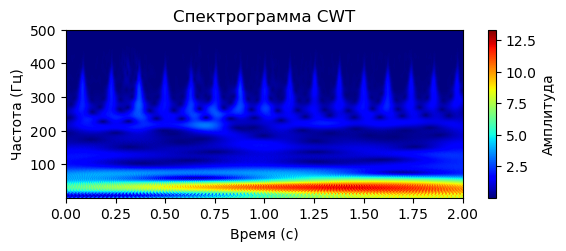

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import pywt

def cwt_spectrogram(x, fs, nNotes=12, detrend=True, normalize=True):
    if detrend:
        x = scipy.signal.detrend(x)
    if normalize:
        x = (x - np.mean(x)) / np.std(x)

    #scales = pywt.scale2frequency('cmor1.5-1.0', np.arange(1, 100+ 1)) / (1/fs)
    N = len(x)
    dt = 1.0/fs
    time = np.arange(N) * dt
    nOctaves = int(np.log2(2*np.floor(N/2.0)))
    scales = 2**np.arange(1, nOctaves, 1.0/nNotes)
    cwtmatr, freqs = pywt.cwt(x, scales, 'cmor1.5-1.0')
    
    return time, cwtmatr, freqs

# Создание синусоидального сигнала с частотой 10 Гц
fs = 1
# Вычисление спектрограммы с помощью CWT
t,cwtmatr, freqs = cwt_spectrogram(ecg_test[:3000], fs, nNotes = 24)
#cwtmatr = cwtmatr[::-1, :]
freqs = freqs*1000
print(freqs)

plt.subplot(2, 1, 2)
plt.imshow(np.abs(cwtmatr), extent=[0, 2 , freqs[-1], freqs[0]], aspect='auto', cmap='jet')
plt.colorbar(label='Амплитуда')
plt.title('Спектрограмма CWT')
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

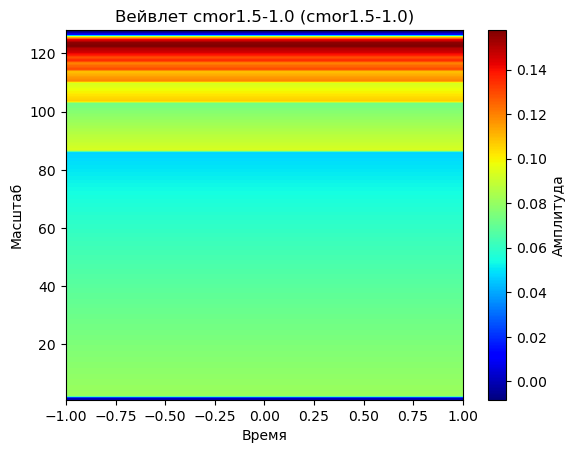

In [11]:
# Однако спектрограмма на 5 периодах выглядит непримечательно, поэтому взял 15 периодов (3000)
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Создаем вейвлет
wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 128+1)
wavelet_data, _ = pywt.cwt([1], scales, wavelet, 1.5)

# Отображаем вейвлет
plt.imshow(np.real(wavelet_data), extent=[-1, 1, 1, 128], cmap='jet', aspect='auto')
plt.title(f'Вейвлет {wavelet} (cmor1.5-1.0)')
plt.xlabel('Время')
plt.ylabel('Масштаб')
plt.colorbar(label='Амплитуда')
plt.show()
# Получилась какая-то хрень

D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


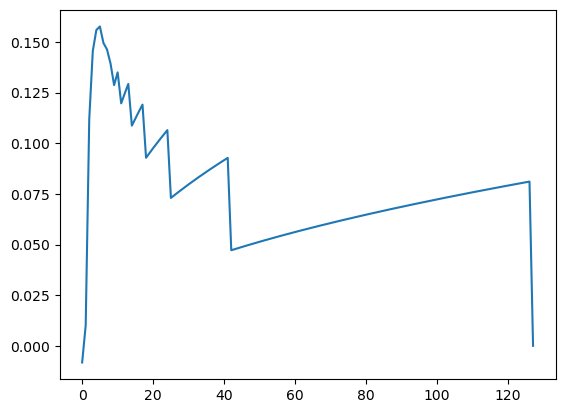

In [12]:
plt.plot((wavelet_data))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import pywt

def cwt_spectrogram(x, fs, nNotes=12, detrend=True, normalize=True):
    if detrend:
        x = scipy.signal.detrend(x)
    if normalize:
        x = (x - np.mean(x)) / np.std(x)

    scales = pywt.scale2frequency('cmor1.5-1.0', np.arange(1, 128+ 1)) / (1/fs)
    cwtmatr, freqs = pywt.cwt(x, scales, 'cmor1.5-1.0')
    
    return cwtmatr, freqs

# Создание синусоидального сигнала с частотой 10 Гц
fs = 1000  # Частота дискретизации
t = np.arange(0, 1, 1/fs)
f = 10  # Частота синусоиды
sig = np.real(np.sin(2 * np.pi * f * t))
print(type(sig[1]))
a = 1
print(type(a))
a 
#print(type(sig[2]))
#for i in range(0,len(sig)):
#    sig[i]= np.astype(np.float)
#print(type(sig[2]))
#for i in range(0,len(sig)):
#    sig[i]=complex(sig[i],0)
#print(type(sig[2]))
#b = complex(7,3)
#print(type(b))
# Вычисление спектрограммы с помощью CWT
cwtmatr, freqs = cwt_spectrogram(sig, fs)
cwtmatr = cwtmatr[::-1, :]
freqs = freqs*1000
print(freqs)
# Отображение сигнала и спектрограммы
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, sig)
plt.title('Синусоидальный сигнал (10 Гц)')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')

plt.subplot(2, 1, 2)
plt.imshow(np.abs(cwtmatr), extent=[0, 2, freqs[0], freqs[-1]], aspect='auto', cmap='jet')
plt.colorbar(label='Амплитуда')
plt.title('Спектрограмма CWT')
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

In [21]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

In [ ]:
pywt

In [36]:
print(ecg_test)
print(complex(ecg_test[1],0))
gfgf = np.zeros(len(ecg_test),dtype = 'complex_')
for i in range(len(ecg_test)):
    gfgf[i] += complex(ecg_test[i],0)
print(gfgf)

[-0.245 -0.215 -0.185 ... -0.405 -0.395 -0.385]
(-0.215+0j)
[-0.245+0.j -0.215+0.j -0.185+0.j ... -0.405+0.j -0.395+0.j -0.385+0.j]


In [38]:
def cwt_spectrogram(x, fs, nNotes=12, detrend=True, normalize=True):
    if detrend:
        x = scipy.signal.detrend(x)
    if normalize:
        x = (x - np.mean(x)) / np.std(x)

    #scales = pywt.scale2frequency('cmor1.5-1.0', np.arange(1, 100+ 1)) / (1/fs)
    N = len(x)
    dt = 1.0/fs
    time = np.arange(N) * dt
    nOctaves = int(np.log2(2*np.floor(N/2.0)))
    scales = 2**np.arange(1, nOctaves, 1.0/nNotes)
    cwtmatr, freqs = pywt.cwt(x, scales, 'db1')
    
    return time, cwtmatr, freqs

# Создание синусоидального сигнала с частотой 10 Гц
fs = 1
# Вычисление спектрограммы с помощью CWT
t,cwtmatr, freqs = cwt_spectrogram(gfgf[:3000], fs, nNotes = 24)
#cwtmatr = cwtmatr[::-1, :]
freqs = freqs*1000
print(freqs)

plt.subplot(2, 1, 2)
plt.imshow(np.abs(cwtmatr), extent=[0, 2 , freqs[-1], freqs[0]], aspect='auto', cmap='jet')
plt.colorbar(label='Амплитуда')
plt.title('Спектрограмма CWT')
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

AttributeError: 'pywt._extensions._pywt.Wavelet' object has no attribute 'complex_cwt'